## Instacart Market Basket Analysis 
## Part - II  : Data Story Telling
The objective is to predict which customer will repurchase a product in his current order, based on a anonymized dataset containing 3,000,000 orders.

Each user then has about 4 - 100 orders.

A user's reorder depends on User, the products that he purchases and the history of his purchases 

In Part- I  of the exrecise, we performed Data Wrangling. There were 6 data sets that were loaded and cleaned.
In this section of the code, Load the data and perform some Data Exploration.

 

## Extraction and Loading 

Lets take  look at a  few datasets provided

In [2]:
% matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Read in the files 

In [3]:
order_products_train_df = pd.read_csv("../../input/order_products__train.csv")
order_products_prior_df = pd.read_csv("../../input/order_products__prior.csv")
orders_df = pd.read_csv("../../input/orders_cleaned.csv")
products_df = pd.read_csv("../../input/products.csv")
aisles_df = pd.read_csv("../../input/aisles.csv")
departments_df = pd.read_csv("../../input/departments.csv")

## Data Exploration 

### Explore  Orders  data frame
The problem here can be described as "given the prior order i.e products that were reordered, predict the products that will be reordered in new orders" 
As an example, if user A had prior orders of the products -  Bread, Eggs and Butter on Saturdays at 8:00 am, would it be possible to build a model from the training set of the latest order, if he would re-order the same three items ?

#### There are 3 data-frames of interest to explore orders
Orders.csv: Each order describes which products a user bought. This file provides 
* order_id - unique identiifcation of an order
* user_id  - Who ordered the product
* eval_set  - prior /train / or test
* order_dow - day on which it was ordered
* order hour_of the day 
* days_since prior_order

The prior eval set indicates a prior order.   The he new orders would belong to either prior or test eval

order_products__\*.csv: The order products file is an association between orders and the products that are in the order.  
* order_id - unique id of the order
* product_id - product_id of the product ordered
* add_to_cart_order - the order in which the product was ordered e.g. Jam was ordered 1st, then bread, then eggs
* reordered - did this product appear in a prior order ?


In [14]:
(rows_order, cols) = order_products_train_df.shape
order_products_train_df.columns
 

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [5]:
(rows_train,cols) = order_products_train_df.groupby('order_id').count().shape

 

In [15]:
(rows_prior,cols) = order_products_prior_df.shape
order_products_prior_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [7]:
print("There are {} observations in the order_df  data set ".format(rows_order))
print("There are {} observations in the order_products_prior data set ".format(rows_prior))
print("There are {} observations in the order_products_train data set".format(rows_train))

There are 1384617 observations in the order_df  data set 
There are 32434489 observations in the order_products_prior data set 
There are 131209 observations in the order_products_train data set


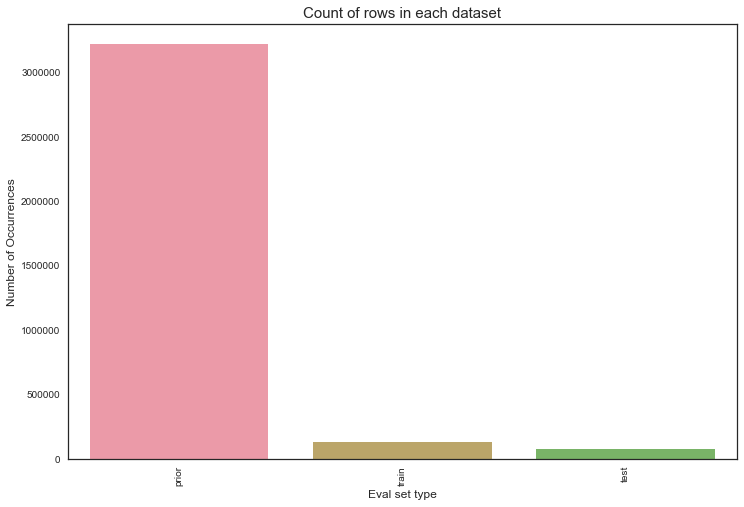

In [18]:
color = sns.color_palette()
sns.set(style="white")
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')

 
plt.show()

Fig. 1:(above): First all orders are classsified as prior orders  and last order. the last order is further divided into training set and test set. So prior order provides the history of a users ordering habit. The model for prediction will need evaluation based on training set. And the final prediction model will be evaluated for accuracy on the test set.

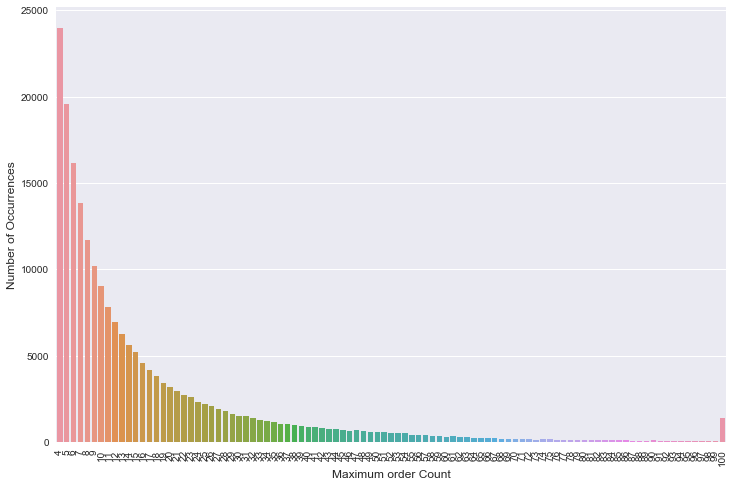

In [18]:
 
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()
 
plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
     sns.barplot(cnt_srs.index, cnt_srs.values, alpha=1.0)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
 

Fig. 2: (above)Each observation in orders_df data frame has order_number field. The order_number represents the order in which a user ordered products. The maximum  of the order number per customer represents the customers ordering habits - how mny products are ordered at the most by a user. We see 23,986 orders had a max of 4 products on one end and about 47 orders had 99 items in them

In [19]:
 cnt_srs.tail(3)

97    54
98    50
99    47
Name: order_number, dtype: int64

In [20]:
cnt_srs.head(3)

4    23986
5    19590
6    16165
Name: order_number, dtype: int64

About 24,000 orders were 4 in number


### Which Hour of the  day do most orders arrive ?

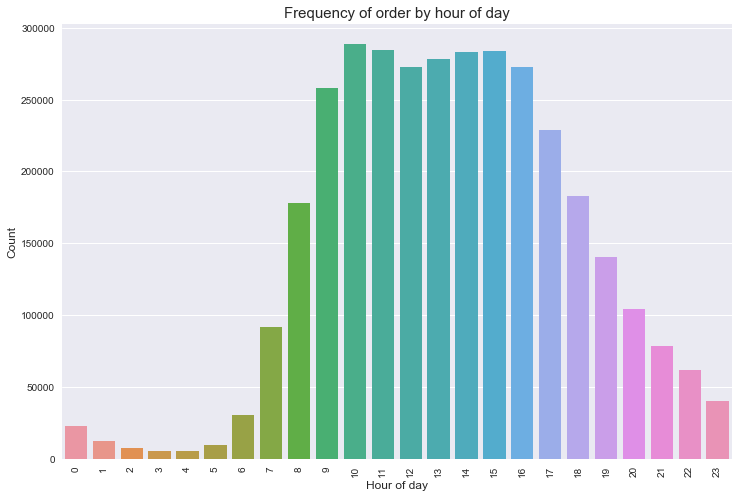

In [45]:
plt.figure(figsize=(12,8))
with sns.dark_palette("purple"):
      sns.countplot(x="order_hour_of_day", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()


Fig. 3: (above) Peak ordering  hours are from 9 a.m. to 5 pm. Most orders arrive at 10 a.m. 

### Which day of the week do most users order ?

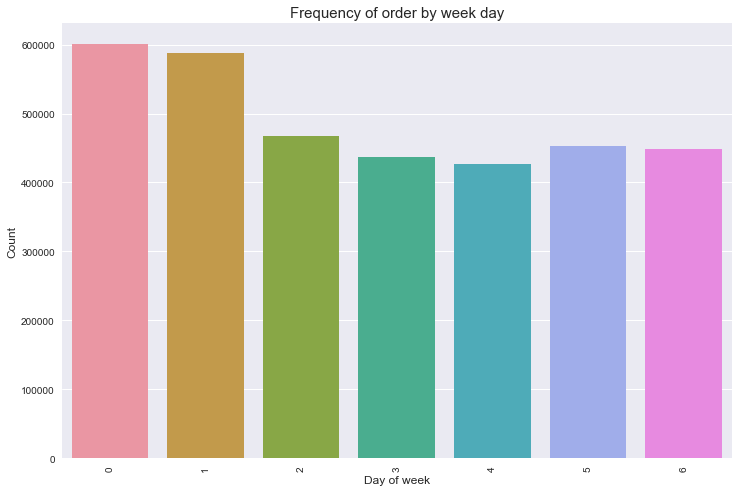

In [22]:
plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
    sns.countplot(x="order_dow", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Fig. 4: (above) : Orders arrive the most on Saturday and Sunday

### When do most users order ?

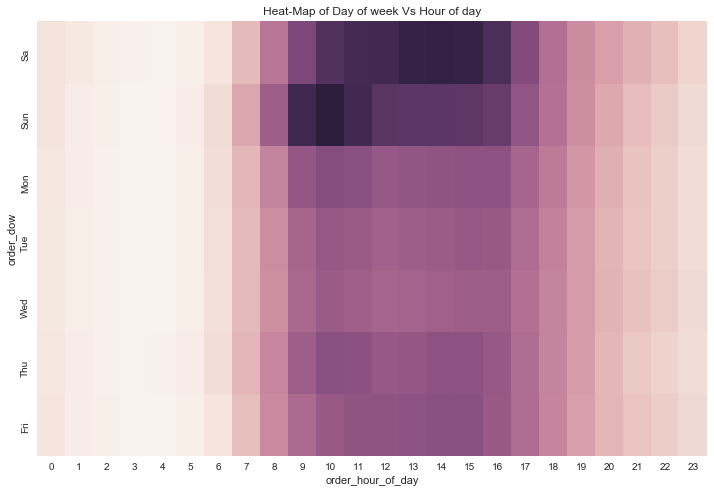

In [50]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,8))
with sns.color_palette("coolwarm",7):
  ax = sns.heatmap(grouped_df, cbar=None, linecolor='White', yticklabels=['Sa','Sun','Mon','Tue','Wed','Thu','Fri'])
  
plt.title("Heat-Map of Day of week Vs Hour of day")
plt.show()

Fig. 5 (above): Users order the most on a Saturday afternoon or Sunday morning.

### How often do Users place order ?


In [107]:
# Here we round to integer the days to next rder and count them
decimals = pd.Series({'days_since_prior_order':0})
days_to_next_order_df = orders_df.round({'days_since_prior_order':0})
 

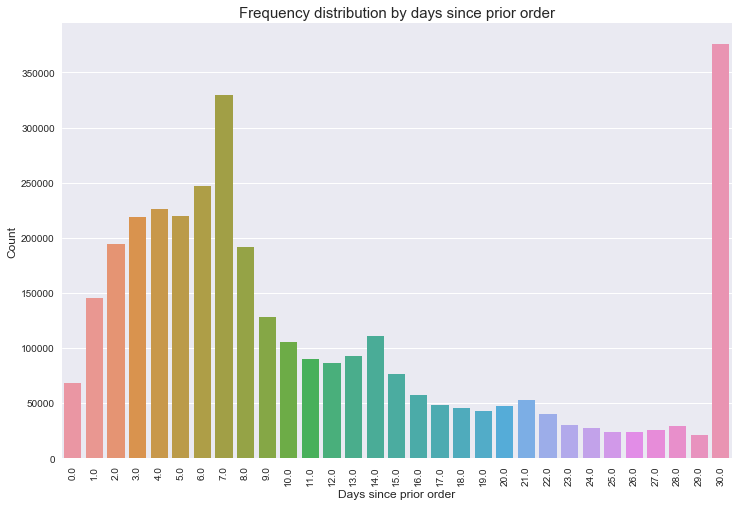

In [110]:
plt.figure(figsize=(12,8))

sns.countplot(x="days_since_prior_order", data=days_to_next_order_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

Fig. 6: (above) Most orders are ordered either every 30 days or every 6 or 7 days